In [3]:
import os
import math
import numpy as np
import datetime as dt
import time
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import warnings
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib nbagg

warnings.filterwarnings('ignore')

In [4]:
X = pd.read_csv('Data/Training_scaled_imputed.csv', index_col=0)
y = data = pd.read_csv('Data/TrainingData.csv', index_col=0)['default_ind']

categorical = ['mvar47', 'mvar48']
numeric = list(X.columns)

for var in categorical:
    numeric.remove(var)

#### Variance Inflation Factor

In [ ]:
VIFs = {}

for var in X.columns:

    ### Remove this after encoding is done
    
    if var in ['mvar48']:
        continue
    
    #######################################
    
    var_y = X[var]
    var_X = X.drop(var, axis=1)
    
    linmod = LinearRegression()
    linmod.fit(var_X, var_y)
    R2 = linmod.score(var_X, var_y)
    VIFs[var] = 1 / (1 - R2)

<IPython.core.display.Javascript object>


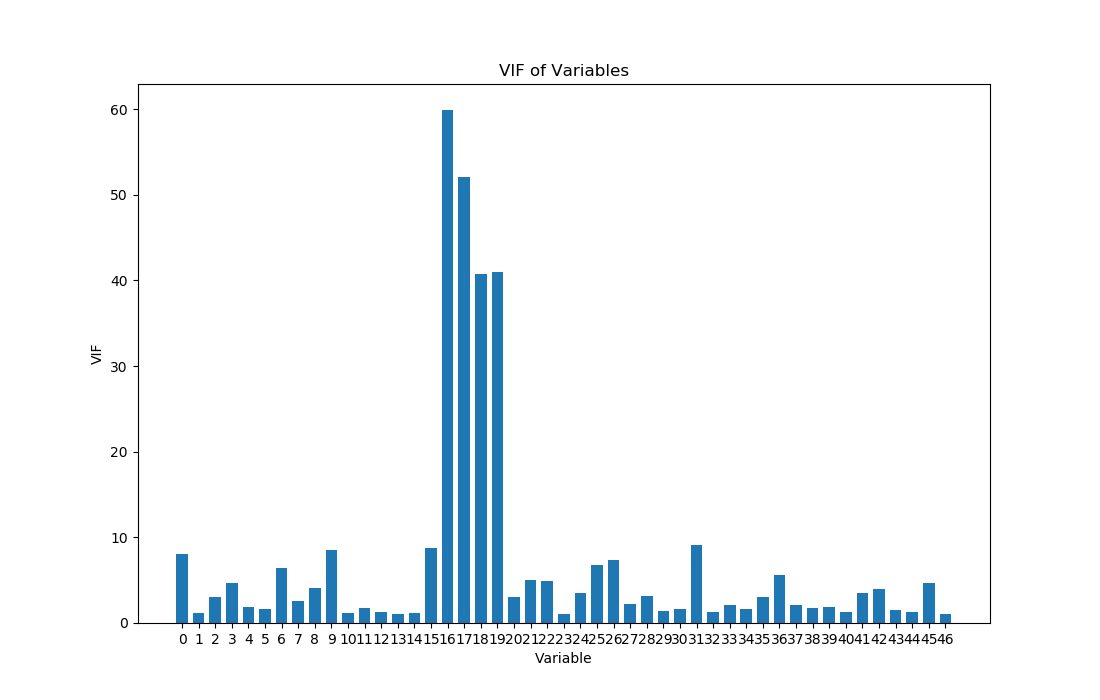

In [12]:
plt.figure(figsize=(11, 7))
plt.bar(range(len(VIFs)), VIFs.values(), width=0.7)
plt.ylabel('VIF')
plt.xlabel('Variable')
plt.title('VIF of Variables')
plt.xticks(range(len(VIFs)))
plt.show()

#### Correlation

<IPython.core.display.Javascript object>


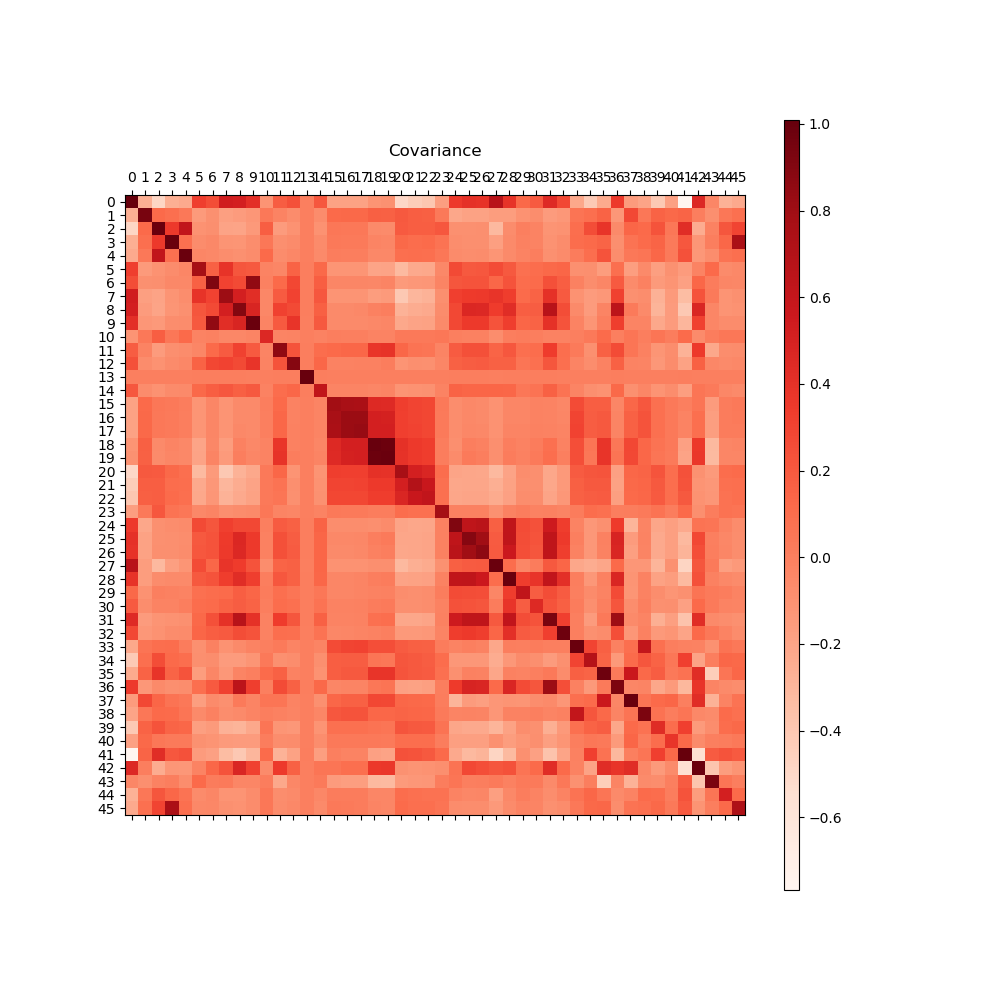

In [16]:
cov_mat = np.round(np.cov(np.array(X[numeric]).T), 3)

fig, ax = plt.subplots(figsize=(10, 10))
img = ax.matshow(cov_mat, cmap='Reds')
fig.colorbar(img, aspect=50)
ax.set_title('Covariance')
ax.set_xticks(ticks=range(len(numeric)))
ax.set_yticks(ticks=range(len(numeric)))

# for (i, j), z in np.ndenumerate(cov_mat):
#     ax.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')